# LINQ & Regex Version of Password Checker

Validation Criteria:
1. Must be between 8-30 characters in length
2. Must contain at least 1 number
3. Must contain at least 1 capital letter (A-Z)
4. Must contain at least 1 of the following symbols (includes spaces):  !"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~
5. Must NOT contain the word "password", regardless of case

In [9]:
string badPassword__password_keyword = "iAmAvERy!sECure123PAssWord!7";
string badPassword__no_symbols = "iAmAvERysECure1237";
string badPassword__no_capitals = "iamvery!secure123!7";
string badPassword__morethan31chars = "iAmAvERysECure123PAssWord7";
string badPassword__lessthan8chars = "vEry1!";
string badPassword_no_nums = "iAmAvERy!sECurePAssWord!";

string goodPassword = "iAmAvERy!sECure123!7";

In [10]:
using System.Linq;
using System.Text.RegularExpressions;

<hr>

### Checking for at least 1 number using `Char.IsDigit()` & `.Any()` Enumerable method from Linq

In [9]:
Console.WriteLine(goodPassword.Any(c => Char.IsDigit(c)));
Console.WriteLine(badPassword_no_nums.Any(c => Char.IsDigit(c)));

True
False


### Checking for at least 1 number using regex

In [11]:
Regex pattern_nums = new Regex("[0-9]+");

Console.WriteLine(pattern_nums.IsMatch(goodPassword));
Console.WriteLine(pattern_nums.IsMatch(badPassword_no_nums));

True
False


<hr>

### Checking for at least 1 capital letter using ASCII conversion & `.Any()` Enumerable method from LINQ

*ASCII A-Z: 65-90*

*Testing*

In [16]:
char aChar = 'A';
char zChar = 'Z';

Console.WriteLine((int)aChar);
Console.WriteLine((int)zChar);

65
90


In [17]:
Console.WriteLine(goodPassword.Any(c => (int)c >= 65 && (int)c <= 90));
Console.WriteLine(badPassword__no_capitals.Any(c => (int)c >= 65 && (int)c <= 90));

True
False


### Checking for at least 1 capital letter using regex

In [12]:
Regex pattern_caps = new Regex("[A-Z]+");

Console.WriteLine(pattern_caps.IsMatch(goodPassword));
Console.WriteLine(pattern_caps.IsMatch(badPassword__no_capitals));

True
False


<hr>

### Checking for at least 1 symbol using `.Intersect()` / `.Any()` Enumerable methods from LINQ

*Testing*

In [7]:
string s1 = "12345";
string s2 = "445678";

IEnumerable<char> strIntersect = s1.Intersect(s2);

foreach (char ch in strIntersect) {
    Console.WriteLine(ch);
}

4
5


In [13]:
string symbols = " !\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~";

IEnumerable<char> symbolIntersectGood = symbols.Intersect(goodPassword);
IEnumerable<char> symbolIntersectBad = symbols.Intersect(badPassword__no_symbols);

Console.WriteLine(symbolIntersectGood.Any());
Console.WriteLine(symbolIntersectBad.Any());


True
False


### Checking for at least 1 symbol using regex

In [18]:
Regex pattern_nosymbols = new Regex("^[a-zA-Z0-9]*$");

Console.WriteLine(!(pattern_nosymbols.IsMatch(goodPassword)));
Console.WriteLine(!(pattern_nosymbols.IsMatch(badPassword__no_symbols)));

True
False


<hr>

### Checking for case-insenstive "password" keyword using `str.Contains()`

*Testing*

In [20]:
string fruit = "apple grapes raspberries pears";

Console.WriteLine(fruit.ToLower().Contains("grape"));
Console.WriteLine(fruit.ToLower().Contains("concrete"));

True
False


In [21]:
Console.WriteLine(goodPassword.ToLower().Contains("password"));
Console.WriteLine(badPassword__password_keyword.ToLower().Contains("password"));

False
True


### Checking for case-insenstive "password" keyword using regex

In [26]:
Regex pattern_password_keyword = new Regex("password");

Console.WriteLine(pattern_password_keyword.IsMatch(goodPassword.ToLower()));
Console.WriteLine(pattern_password_keyword.IsMatch(badPassword__password_keyword.ToLower()));

False
True


<hr>
<hr>

### FINAL

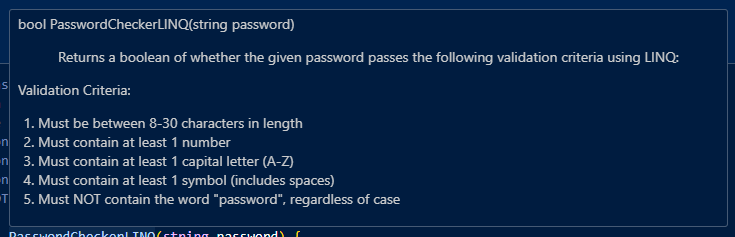

In [37]:
/// <summary> Returns a boolean of whether the given password passes the following validation criteria using LINQ
/// <para>Validation Criteria:</para>
/// <para>1. Must be between 8-30 characters in length</para>
/// <para>2. Must contain at least 1 number</para>
/// <para>3. Must contain at least 1 capital letter (A-Z)</para>
/// <para>4. Must contain at least 1 symbol (includes spaces)</para>
/// <para>5. Must NOT contain the word "password", regardless of case</para>
/// </summary>
internal static bool PasswordCheckerLINQ(string password) {

    int passwordLength = password.Length;

    if (passwordLength < 8 || passwordLength > 30) {
        return false;
    }

    string symbols = " !\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~";

    bool validateNums = password.Any(c => Char.IsDigit(c));
    bool validateCaps = password.Any(c => (int)c >= 65 && (int)c <= 90);
    bool validateSymbols = password.Intersect(symbols).Any();
    bool validateNoPasswordKeyword = !(password.ToLower().Contains("password"));

    return validateNums && validateCaps && validateSymbols && validateNoPasswordKeyword;
}


internal static bool PasswordCheckerREGEX(string password) {

    int passwordLength = password.Length;
    
    if (passwordLength < 8 || passwordLength > 30) {
        return false;
    }

    Regex patternNums = new Regex("[0-9]+");
    Regex patternCaps = new Regex("[A-Z]+");
    Regex patternNoSymbols = new Regex("^[a-zA-Z0-9]*$");
    Regex patternPasswordKeyword = new Regex("password");

    bool validateNums = patternNums.IsMatch(password);
    bool validateCaps = patternCaps.IsMatch(password);
    bool validateSymbols = !(patternNoSymbols.IsMatch(password));
    bool validateNoPasswordKeyword = !(patternPasswordKeyword.IsMatch(password.ToLower()));

    return validateNums && validateCaps && validateSymbols && validateNoPasswordKeyword;

}

In [36]:
Console.WriteLine(PasswordCheckerLINQ(badPassword__password_keyword));
Console.WriteLine(PasswordCheckerLINQ(badPassword__no_symbols));
Console.WriteLine(PasswordCheckerLINQ(badPassword__no_capitals));
Console.WriteLine(PasswordCheckerLINQ(badPassword__morethan31chars));
Console.WriteLine(PasswordCheckerLINQ(badPassword__lessthan8chars));
Console.WriteLine(PasswordCheckerLINQ(badPassword_no_nums));

Console.WriteLine(PasswordCheckerLINQ(goodPassword));

False
False
False
False
False
False
True


In [38]:
Console.WriteLine(PasswordCheckerREGEX(badPassword__password_keyword));
Console.WriteLine(PasswordCheckerREGEX(badPassword__no_symbols));
Console.WriteLine(PasswordCheckerREGEX(badPassword__no_capitals));
Console.WriteLine(PasswordCheckerREGEX(badPassword__morethan31chars));
Console.WriteLine(PasswordCheckerREGEX(badPassword__lessthan8chars));
Console.WriteLine(PasswordCheckerREGEX(badPassword_no_nums));

Console.WriteLine(PasswordCheckerREGEX(goodPassword));

False
False
False
False
False
False
True


<hr>

### *Initial Brainstorming - Testing Linq with char array*

In [8]:
Console.WriteLine(goodPassword.Length);

20


In [10]:
char[] goodPassword_split = goodPassword.ToCharArray();


foreach (char c in goodPassword_split) {
    Console.WriteLine(c);
}

i
A
m
A
v
E
R
y
!
s
E
C
u
r
e
1
2
3
!
7


In [12]:
var query = from c in goodPassword_split
            where c == 'A'
            select c;

foreach (var c1 in query) {
    Console.WriteLine(c1);
}

A
A


In [13]:
var query1 = goodPassword_split.Where(c2 => c2.ToString().ToUpper() == c2.ToString());

foreach (var c3 in query1) {
    Console.WriteLine(c3);
}

A
A
E
R
!
E
C
1
2
3
!
7
